In [1]:
import pandas as pd

# EIS Imports

In [13]:
EIS_10mV_C001 = pd.read_csv("EIS_10mV_Timing task2025_04_29_11_50_C001.z60",
                           skiprows=11,
                           sep='\s+',
                           names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
                           header=None
                           )

#

In [14]:
EIS_10mV_C001

Freq  Ampl      Bias        Time           Z'          Z''   GD  \
0    100000.000000  10.0 -0.246816     3.49460     15.55570      5.27726  0.0   
1     89051.300000  10.0 -0.246816     5.78299     13.80450     16.94240  0.0   
2     79301.400000  10.0 -0.246816     8.05283     13.90250     14.04590  0.0   
3     70618.900000  10.0 -0.246816    13.68890      4.37749      1.17738  0.0   
4     62887.000000  10.0 -0.246816    15.97240      4.40899      1.03117  0.0   
..             ...   ...       ...         ...          ...          ...  ...   
135       0.014616  10.0 -0.246816  1041.78000  33173.20000  -7535.82000  0.0   
136       0.013016  10.0 -0.246816  1120.51000  59320.90000  -4182.78000  0.0   
137       0.011591  10.0 -0.246816  1208.77000  47652.70000  -9034.40000  0.0   
138       0.010322  10.0 -0.246816  1307.67000  38840.50000 -11131.10000  0.0   
139       0.010000  10.0 -0.246816  1409.71000  38631.00000   2761.22000  0.0   

     Err  Range  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
..   ...    ...  
135    0      0  
136    0      0  
137    0      0  
138    0      0  
139    0      0  

[140 rows x 9 columns]

# OCP Imports

In [20]:
OCP_C001 = pd.read_csv("OCP_Timing task2025_04_29_11_50_C001.cor",
                       skiprows=25,
                       sep='\s+',
                       names=["E", "i", "T"],
                       header=None
                       )                       

#E(V)		i(A/cm²)		T(s)

In [21]:
OCP_C001

E             i       T
0     -0.247764  1.000000e-10     0.0
1     -0.247772  1.000000e-10     0.1
2     -0.247790  1.000000e-10     0.2
3     -0.247798  1.000000e-10     0.3
4     -0.247809  1.000000e-10     0.4
...         ...           ...     ...
17996 -0.247102  1.000000e-10  1799.6
17997 -0.247068  1.000000e-10  1799.7
17998 -0.247039  1.000000e-10  1799.8
17999 -0.247008  1.000000e-10  1799.9
18000 -0.247001  1.000000e-10  1800.0

[18001 rows x 3 columns]

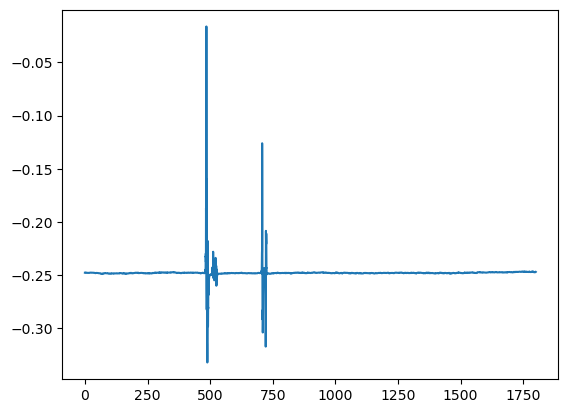

In [23]:
import matplotlib.pyplot as plt
plt.plot(OCP_C001["T"], OCP_C001["E"])

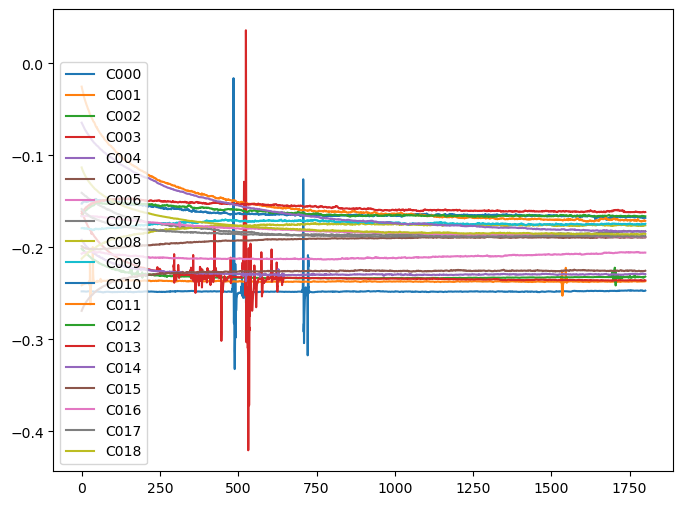

In [40]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f) and 'cor' in f]
files = sorted(files)
files

OCP = {}
for i, file in enumerate(files):
    OCP[f"C{i:>03}"] = pd.read_csv(file,
                       skiprows=25,
                       sep='\s+',
                       names=["E", "i", "T"],
                       header=None
                       )             
fig, ax = plt.subplots(figsize=(8,6))

for cycle, data in OCP.items():
    ax.plot(data["T"], data["E"], label=cycle) 

ax.legend(loc="lower left")

# Simulation

In [45]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess = [.01, .01, 100, .01, .05, 100, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

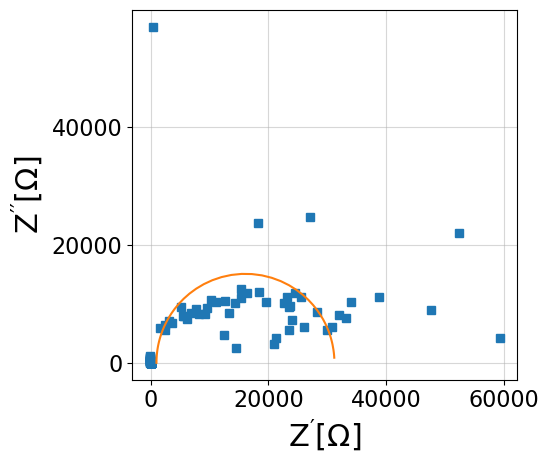

In [81]:
import pandas as pd
import numpy as np

EIS_10mV_C001 = pd.read_csv("EIS_10mV_Timing task2025_04_29_11_50_C001.z60",
                           skiprows=11,
                           sep='\s+',
                           names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
                           header=None
                           )

frequencies = EIS_10mV_C001["Freq"].to_numpy()
Z = EIS_10mV_C001["Z'"].to_numpy() + EIS_10mV_C001["Z''"].to_numpy() * 1j

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)'
initial_guess = [.01, .01, 100]
circuit = CustomCircuit(circuit, initial_guess=initial_guess)
circuit.fit(frequencies, Z)

Z_fit = circuit.predict(frequencies)

import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()

ax.plot(np.real(Z),     -np.imag(Z), 
        's', label="Data")
ax.plot(np.real(Z_fit), -np.imag(Z_fit), 
        '-', label="Fit")

# Make the axes square
ax.set_aspect('equal')

# Set the labels to -imaginary vs real
ax.set_xlabel(r"$Z^{\prime} [\Omega]$")
ax.set_ylabel(r"$Z^{\prime\prime} [\Omega]$")


# Make the tick labels larger
ax.tick_params(axis='both', which='major')


# Change the number of labels on each axis to five
ax.locator_params(axis='x', nbins=5, tight=True)
ax.locator_params(axis='y', nbins=5, tight=True)


# Add a light grid
ax.grid(visible=True, which='major', axis='both', alpha=.5)


# Change axis units to 10**log10(scale) and resize the offset text
#ax.ticklabel_format(style='sci', axis='both',
#                        scilimits=(limits, limits))
#y_offset = ax.yaxis.get_offset_text()
#y_offset.set_size(18)
#t = ax.xaxis.get_offset_text()
#t.set_size(18)



#plot_nyquist(Z, fmt='o', scale=10, ax=ax)
#plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

#plt.legend(['Data', 'Fit'])
plt.show()

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from impedance.models.circuits import CustomCircuit
# from impedance.visualization import plot_nyquist # Kept if you want to switch plotting methods

# --- Configuration ---
FILENAME = "EIS_10mV_Timing task2025_04_29_11_50_C001.z60"
CIRCUIT_STRING = 'R0-p(R1,C1)'
INITIAL_GUESS = [0.01, 0.01, 100] # R0, R1, C1

# --- Data Loading ---
try:
    data_df = pd.read_csv(
        FILENAME,
        skiprows=11,
        sep='\s+',
        names=["Freq", "Ampl", "Bias", "Time", "Z'", "Z''", "GD", "Err", "Range"],
        header=None
    )
except FileNotFoundError:
    print(f"Error: The file '{FILENAME}' was not found.")
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Extract frequencies and impedance components
frequencies = data_df["Freq"].to_numpy()
# Z' is the real part, Z'' is the imaginary part
Z_real = data_df["Z'"].to_numpy()
Z_imag = data_df["Z''"].to_numpy()
Z = Z_real + 1j * Z_imag

# --- Preprocessing ---
# Keep only the impedance data in the "first quadrant" of a Nyquist plot
# (Re(Z) > 0 and -Im(Z) > 0  => Im(Z) < 0)
mask = (Z.real > 0) & (Z.imag < 0)
frequencies_filtered = frequencies[mask]
Z_filtered = Z[mask]

if len(Z_filtered) == 0:
    print("Warning: After filtering for the first quadrant, no data points remain.")
    # Decide how to proceed: exit, or try to fit with unfiltered data, etc.
    # For now, we'll try to fit with unfiltered if filtered is empty.
    if len(Z) > 0:
        print("Attempting to fit with unfiltered data.")
        frequencies_to_fit = frequencies
        Z_to_fit = Z
    else:
        print("Error: No data to fit.")
        exit()
else:
    frequencies_to_fit = frequencies_filtered
    Z_to_fit = Z_filtered


# --- Circuit Fitting ---
# Ensure there's data to fit
if len(frequencies_to_fit) > 0 and len(Z_to_fit) > 0:
    circuit_model = CustomCircuit(circuit_str=CIRCUIT_STRING, initial_guess=INITIAL_GUESS)
    try:
        circuit_model.fit(frequencies_to_fit, Z_to_fit)
        Z_fit = circuit_model.predict(frequencies_to_fit)
        fit_successful = True
    except Exception as e:
        print(f"Error during circuit fitting: {e}")
        Z_fit = np.array([]) # Empty array if fit fails
        fit_successful = False
else:
    print("Skipping circuit fitting as there is no data after preprocessing.")
    Z_fit = np.array([]) # Empty array if no data to fit
    fit_successful = False

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 8)) # You can adjust figsize

# Plot experimental data (use Z_to_fit which is potentially filtered)
ax.plot(Z_to_fit.real, -Z_to_fit.imag,
        marker='s', linestyle='none', markersize=6, label="Experimental Data")

# Plot fitted data if successful
if fit_successful and len(Z_fit) > 0:
    ax.plot(Z_fit.real, -Z_fit.imag,
            linestyle='-', color='red', linewidth=2, label="Fit")

# Make the axes square
ax.set_aspect('equal')

# Set the labels
ax.set_xlabel(r"$Z^{\prime} [\Omega]$")
ax.set_ylabel(r"$-Z^{\prime\prime} [\Omega]$") # Corrected label for negative imaginary axis
ax.set_title("Nyquist Plot")

# Make the tick labels larger (adjust '12' as needed)
ax.tick_params(axis='both', which='major', labelsize=12)

# Change the number of ticks (locator_params finds "nice" locations)
ax.locator_params(axis='x', nbins=6, tight=True)
ax.locator_params(axis='y', nbins=6, tight=True)

# Add a light grid
ax.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.7)

# Add legend
ax.legend()

# Optional: Uncomment and adjust if scientific notation for axes is desired
# limits = 0 # Example: display in 10^0 (normal) or 10^3 (kilo) etc.
# ax.ticklabel_format(style='sci', axis='both', scilimits=(limits, limits))
# y_offset = ax.yaxis.get_offset_text()
# if y_offset.get_text(): # Check if offset text exists
#     y_offset.set_size(12) # Adjust size
# x_offset = ax.xaxis.get_offset_text()
# if x_offset.get_text(): # Check if offset text exists
#     x_offset.set_size(12) # Adjust size

# Alternative plotting using impedance.visualization (if you prefer)
# if fit_successful and len(Z_fit) > 0 :
#     fig_nyquist, ax_nyquist = plt.subplots(figsize=(8,8))
#     plot_nyquist(Z_to_fit, fmt='s', ax=ax_nyquist, label='Data')
#     plot_nyquist(Z_fit, fmt='-', ax=ax_nyquist, label='Fit')
#     ax_nyquist.legend()
#     ax_nyquist.set_xlabel(r"$Z^{\prime} [\Omega]$")
#     ax_nyquist.set_ylabel(r"$-Z^{\prime\prime} [\Omega]$")
#     ax_nyquist.set_title("Nyquist Plot (impedance.visualization)")

plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

TypeError: BaseCircuit.__init__() got an unexpected keyword argument 'circuit_str'